In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [ ]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

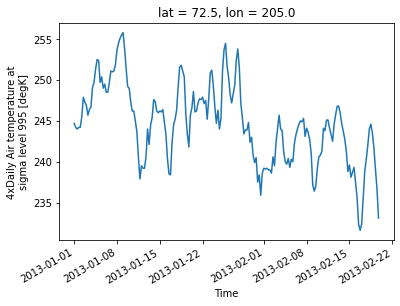

In [ ]:
kinnah = ds.air.sel(lat=72.5,lon=205.0)
kinnah[:200].plot()


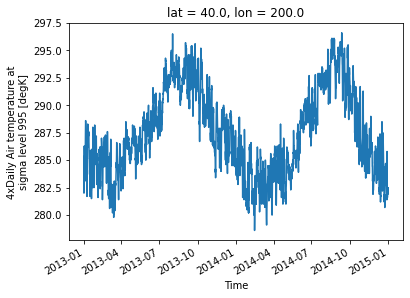

In [ ]:
kinnah1 = ds.air.sel(lat=39.6837,lon=75.7497, method = 'nearest')
kinnah1.plot()


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([13.822754, 13.922754, 14.022754, 14.122754, 14.222754, 14.322754,
        14.422754, 14.522754, 14.622754, 14.722754, 14.822754],
       dtype=float32),
 <a list of 10 Patch objects>)

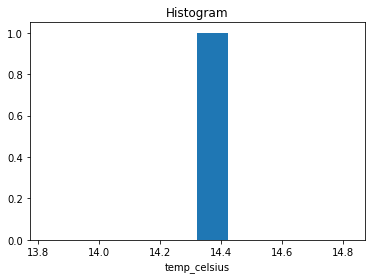

In [ ]:
temp_kelvin = ds.air.mean(dim='time')
temp_kelvin

temp_celsius = temp_kelvin - 273.15 

ds['temp_celsius'] = temp_celsius
ds['temp_kelvin'] = temp_kelvin

kinnah2 = ds.temp_celsius.sel(lat=39.6837,lon=75.7497, method = 'nearest')
kinnah2.plot()

In [ ]:
#QUESTION 3
import warnings
warnings.filterwarnings('ignore')
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr



In [ ]:
treeData = xr.open_dataset('tmax..nc')
treeData

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    treecov  (lat, lon) float32 ...
Attributes:
    source:   UMD Tree Cover Data resampled to 0.5-degrees
    data:     gl-latlong-8km-landcover.bsq.gz
    history:  P.J. Bartlein, 20 Feb 2008

In [ ]:

treeData.where((treeData == [0]))

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    treecov  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    source:   UMD Tree Cover Data resampled to 0.5-degrees
    data:     gl-latlong-8km-landcover.bsq.gz
    history:  P.J. Bartlein, 20 Feb 2008

In [ ]:
!pip install netCDF4
import netCDF4

In [ ]:
import netCDF4 as nc
trim = nc.Dataset("treecov.nc")

In [ ]:
trim.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (720,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('treecov', <class 'netCDF4._netCDF4.Variable'>
              float32 treecov(lat, lon)
                  name: treecov
                  long_name: treecov
                  units: 1
                  _FillValue: -9.0

In [ ]:

lon = trim.variables['lon']
lat = trim.variables['lat']
treeData = trim.variables['treecov'] 


In [ ]:

lon2d, lat2d = np.meshgrid(lon, lat)

In [ ]:
plt.figure(figsize=(6,5))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.coastlines()
plt.show()


In [ ]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
!pip install metpy
import metpy.calc as mpcalc
from metpy.units import units
from netCDF4 import num2date
import numpy as np
import scipy.ndimage as ndimage

import xarray as xr

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 215kB 11.6MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 


In [ ]:
data = xr.open_dataset("treecov.nc")

data

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    treecov  (lat, lon) float32 ...
Attributes:
    source:   UMD Tree Cover Data resampled to 0.5-degrees
    data:     gl-latlong-8km-landcover.bsq.gz
    history:  P.J. Bartlein, 20 Feb 2008

In [ ]:
treeData = data.metpy.parse_cf('treecov')

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [ ]:
proj = treeData.metpy.cartopy_crs

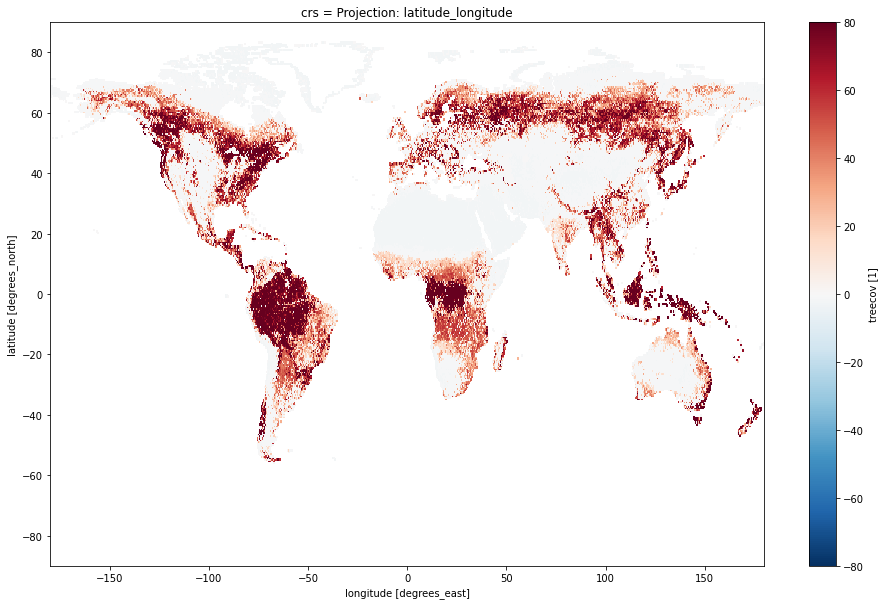

In [ ]:
fig = plt.figure(figsize=(16,10))
treeData.plot()


Text(0.5, 1.0, 'Reprojected to Robinson')

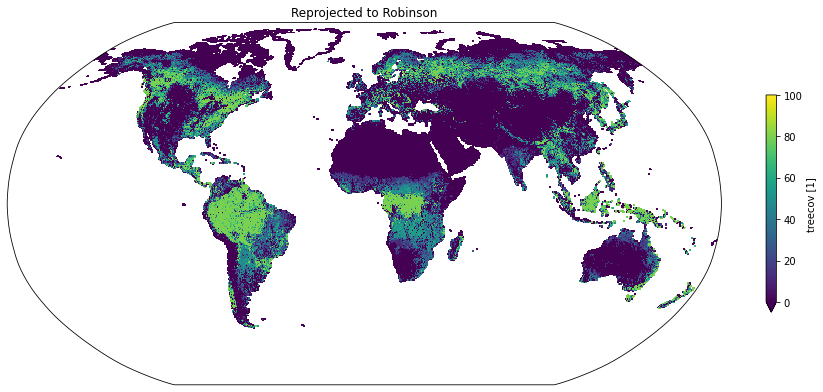

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.Robinson())
treeData.plot(ax=ax, transform=proj,
         vmin=0, vmax=100, cbar_kwargs={'shrink': 0.4}) # notice the cmap argument
plt.title("Reprojected to Robinson")

Text(0.5, 1.0, 'Reprojected to LambertConformal')

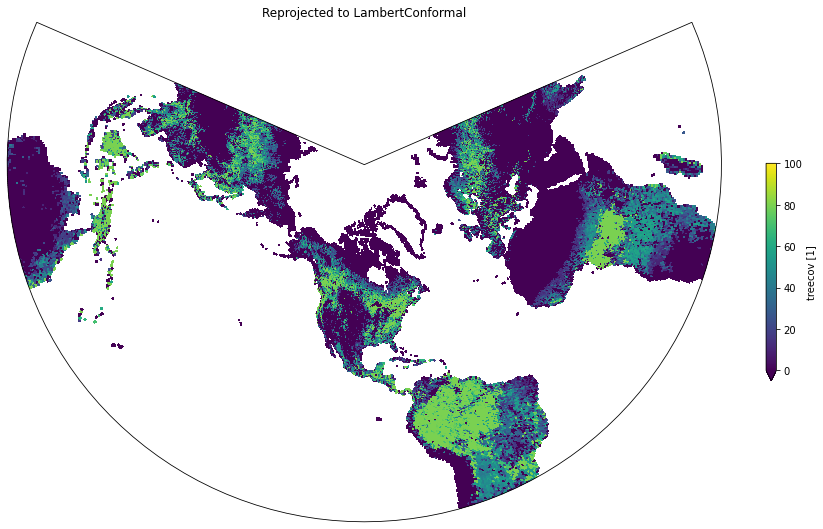

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.LambertConformal())
treeData.plot(ax=ax, transform=proj,
         vmin=0, vmax=100, cbar_kwargs={'shrink': 0.4}) # notice the cmap argument
plt.title("Reprojected to LambertConformal")

In [ ]:
#QUESTION 5

In [ ]:
# Open the netCDF file as a xarray Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Any import of metpy will activate the accessors
import metpy.calc as mpcalc
from metpy.testing import get_test_data
from metpy.units import units
data = xr.open_dataset(get_test_data('irma_gfs_example.nc', False))

# Parse the entire dataset as a metpy dataset instead of just doing it variable by variable like we did above
data = data.metpy.parse_cf()
# View a summary of the Dataset
print(data)

<xarray.Dataset>
Dimensions:                              (isobaric1: 21, isobaric3: 31, latitude: 81, longitude: 131, time1: 9)
Coordinates:
  * time1                                (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:00:00
    reftime                              datetime64[ns] 2017-09-05T12:00:00
  * latitude                             (latitude) float32 50.0 49.5 ... 10.0
  * isobaric1                            (isobaric1) float64 1e+04 ... 1e+05
  * longitude                            (longitude) float32 250.0 ... 315.0
    crs                                  object Projection: latitude_longitude
  * isobaric3                            (isobaric3) float64 100.0 ... 1e+05
Data variables:
    Vertical_velocity_pressure_isobaric  (time1, isobaric1, latitude, longitude) float32 ...
    Relative_humidity_isobaric           (time1, isobaric3, latitude, longitude) float32 ...
    Temperature_isobaric                 (time1, isobaric3, latitude, longitude) fl

In [ ]:
from netCDF4 import Dataset as nc
file=nc('GFS_20101026_1200.nc')

In [ ]:
gfs = xr.open_dataset("GFS_20101026_1200.nc")

In [ ]:
import scipy.ndimage as nd
import matplotlib.pyplot as plt
!pip install cartopy

import cartopy.feature as cf
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

  Using cached https://files.pythonhosted.org/packages/46/c1/04e50c9986842f00f7db0e7a65caa896840050d7328f74e5b7437aa01179/Cartopy-0.18.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


ModuleNotFoundError: ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
#Google Drive specific path
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/Shared drives/MATH870_Shared_Drive/MATH870/Notebooks/Ibrahim/OR_ABI-L2-SSTF-M3_G16_s20192081300453_e20192081400161_c20192081406297.nc'

In [ ]:
import xarray as xr
!pip install netCDF4



In [ ]:
oceanSST = xr.open_dataset('OR_ABI-L2-SSTF-M3_G16_s20192081300453_e20192081400161_c20192081406297.nc')

In [ ]:
oceanSST

<xarray.Dataset>
Dimensions:     (latitude: 1989, longitude: 2778, time: 1)
Coordinates:
  * latitude    (latitude) float32 16.002832 16.020933 ... 51.967533 51.985634
  * longitude   (longitude) float32 -99.99015 -99.972145 ... -50.004147
  * time        (time) datetime64[ns] 2019-07-27T13:30:30
Data variables:
    Band15      (time, latitude, longitude) float32 ...
    DQF         (time, latitude, longitude) float32 ...
    SST         (time, latitude, longitude) float32 ...
    projection  float32 ...
Attributes:
    creator_name:          James Simkins
    creator_email:         simkins@udel.edu
    institution:           University of Delaware Ocean Exploration, Remote S...
    url:                   http://orb.ceoe.udel.edu/
    source:                satellite observation NASA MODIS-Aqua instrument
    groundstation:         University of Delaware, Newark, Center for Remote ...
    software:              0.0
    inputMET1:             0.0
    inputOZONE1:           0.0
    inputCalibrationFile:  0.0
    product_list:          SST, DQF
    summary:               GOES16 SST product, reprojected to EPSG:4326.
    history:               Sat Jul 27 10:27:47 2019: ncks /data/GOES/GOES-R/s...
    NCO:                   netCDF Operators version 4.7.5 (Homepage = http://...

In [ ]:
oceanSST['DQF']

<xarray.DataArray 'DQF' (time: 1, latitude: 1989, longitude: 2778)>
[5525442 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 16.002832 16.020933 ... 51.967533 51.985634
  * longitude  (longitude) float32 -99.99015 -99.972145 ... -50.02215 -50.004147
  * time       (time) datetime64[ns] 2019-07-27T13:30:30
Attributes:
    long_name:      ABI L2+ Sea Surface (Skin) Temperature data quality flags
    standard_name:  status_flag
    units:          1
    flag_values:    [0 1 2 3]
    flag_meanings:  good_quality_qf degraded_quality_qf severely_degraded_qua...

In [ ]:
oceanSST['DQF'][0]

<xarray.DataArray 'DQF' (latitude: 1989, longitude: 2778)>
[5525442 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 16.002832 16.020933 ... 51.967533 51.985634
  * longitude  (longitude) float32 -99.99015 -99.972145 ... -50.02215 -50.004147
    time       datetime64[ns] 2019-07-27T13:30:30
Attributes:
    long_name:      ABI L2+ Sea Surface (Skin) Temperature data quality flags
    standard_name:  status_flag
    units:          1
    flag_values:    [0 1 2 3]
    flag_meanings:  good_quality_qf degraded_quality_qf severely_degraded_qua...

In [ ]:
oceanSST['longitude'].values, oceanSST['latitude'].values

(array([-99.99015 , -99.972145, -99.95415 , ..., -50.04015 , -50.02215 ,
        -50.004147], dtype=float32),
 array([16.002832, 16.020933, 16.039032, ..., 51.949432, 51.967533,
        51.985634], dtype=float32))

In [ ]:
import numpy as np

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent((-100,-60,16,52), crs=ccrs.PlateCarree())
im = ax.pcolormesh(oceanSST['longitude'].values, oceanSST['latitude'].values, oceanSST['DQF'][0].values,
                   cmap='jet', transform=ccrs.PlateCarree(), vmin=250,vmax=300)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
plt.colorbar(im, label="Degrees Kelvin")

# Plot lat / lon ticks
plt.xticks(np.arange(np.min(oceanSST['longitude'].values), np.max(oceanSST['longitude'].values), 10))
plt.yticks(np.arange(np.min(oceanSST['latitude'].values), np.max(oceanSST['latitude'].values), 10))

# Plot x/y labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot Title
plt.title("DQF(0) Brightness Temperature")

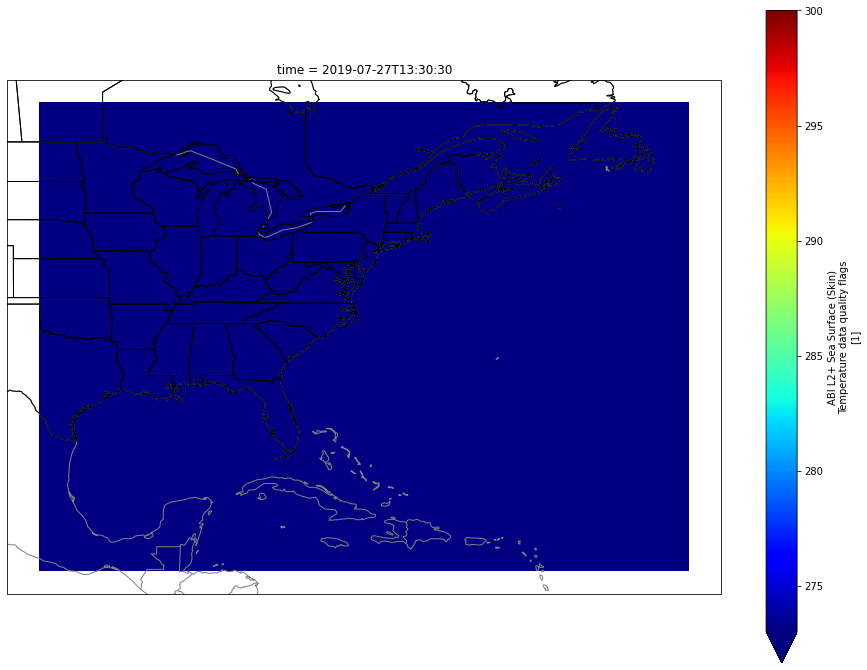

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

oceanSST['DQF'][0].plot(cmap='jet', vmin=273, vmax=300)
ax.add_feature(cf.COASTLINE, color='Gray', edgecolor='Black')
ax.add_feature(cf.BORDERS, color='Gray', edgecolor='Black')
ax.add_feature(cf.STATES, edgecolor='Black')

In [ ]:
oceanSST = oceanSST['SST'].where(oceanSST['DQF'] == 0)
oceanSST

<xarray.DataArray 'SST' (time: 1, latitude: 1989, longitude: 2778)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 16.002832 16.020933 ... 51.967533 51.985634
  * longitude  (longitude) float32 -99.99015 -99.972145 ... -50.02215 -50.004147
  * time       (time) datetime64[ns] 2019-07-27T13:30:30
Attributes:
    long_name:      ABI L2+ Sea Surface (Skin) Temperature
    standard_name:  sea_surface_skin_temperature
    units:          K
    resolution:     y: 0.000056 rad x: 0.000056 rad

In [ ]:
import cartopy.feature as cf

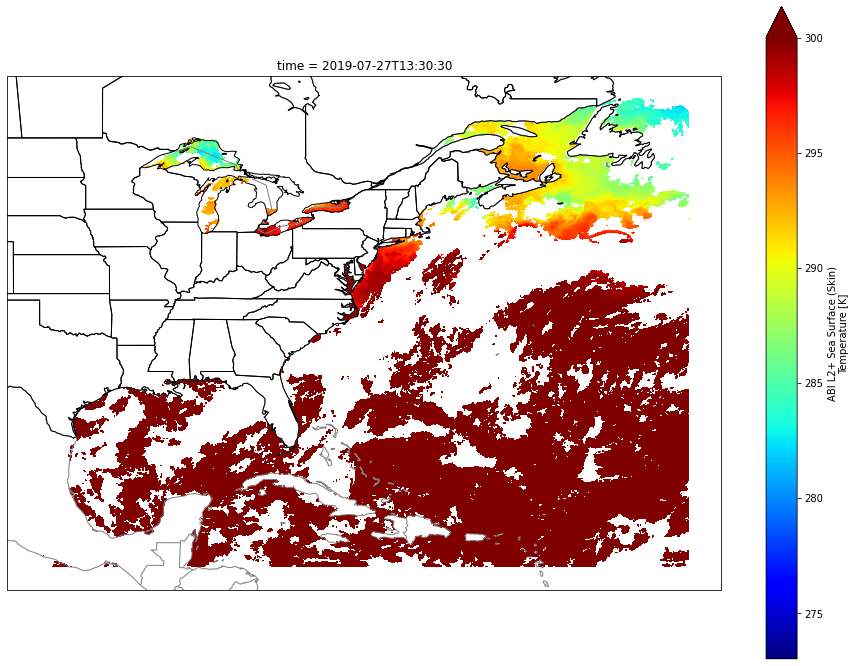

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

oceanSST.plot(cmap='jet', vmin=273, vmax=300)
ax.add_feature(cf.COASTLINE, color='Gray', edgecolor='Black')
ax.add_feature(cf.BORDERS, color='Gray', edgecolor='Black')
ax.add_feature(cf.STATES, edgecolor='Black')